"Geo Data Science with Python" 
### Notebook Lesson 7b

# Selecting points inside a boundary

The purpose of this notebook is to introduce some content of the Python module **Shapely** and make use of it's classes for selecting points inside a boundary and generating a regional mask raster.

### Sources
Documentation pages of the module [Shapely](https://shapely.readthedocs.io/en/stable/index.html) and the [Python-GIS page about Shapely](https://automating-gis-processes.github.io/CSC18/lessons/L4/point-in-polygon.html).

---


# Part A: Module Shapely

In previous lesson parts, we calculated statistics for gridded data over the entire globe or a certain bounding box (lat/lon box). In a more realistic scenario, we would be interested to retrieve statistics for a certain geographical or political area, like an ocean region (like the Atlatnic), a river basin, a country or a state.

Such boundaries are not lat/lon blocks, but defined by more complex polygons and we cannot simply slice them out of the arrays. To be able to select unregularly shaped region from a data array, we will peak into a module, which provides us with tools to perform exactly that: selecting raster data within a region. As you will see later, this is a very typical Geoscience problem, which reduces to the problem of finding out whether a **point falls inside a polygon**. 

Here, you will learn to do this in Python with the module shapely.

<img src="./images/Image_Shapely.png" width="500" />

Figure 1: *Fundamental geometric objects that can be used in Python with Shapely module*

## Creating Points and Lines using Shapely

The most fundamental geometric objects are Points, Lines and Polygons which are the basic ingredients when working with spatial data in vector format. Python has a specific module called Shapely, which can be used to create and work with planar geometric objects. There are many useful functionalities that you can do with Shapely such as:

* Create a Line or Polygon from a Collection of Point geometries
* Calculate areas/length/bounds etc. of input geometries
* Make geometric operations based on the input geometries such as Union, Difference, Distance etc.
* Make spatial queries between geometries such Intersects, Touches, Crosses, Within etc.

Geometric Objects consist of coordinate tuples where:

* Point-objects represent a single point in space. Points can be either two-dimensional (x, y) or three dimensional (x, y, z).
* LineString-objects (i.e. a line) represent a sequence of points joined together to form a line. Hence, a line consist of a list of at least two coordinate tuples
* Polygon objects represents a filled area that consists of a list of at least three coordinate tuples that forms the exterior ring and a (possible) list of hole polygons.

Here we will look only into selected parts of the module: **Points and Polygons** and related functions `within()` and `contain()`, which are necessary to perform the final project.

### Point

During a previous lesson, you were coding your a class Point. Shapely offers something similar, but it comes with many more methods and attributes.

Creating a shapely Point is easy, you pass x and y coordinates into a Point()-object:

In [1]:
# Import geometric object Point from shapely module
from shapely.geometry import Point, Polygon

In [2]:
# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)

Let’s see what the variables look like

In [3]:
# printing point 1 to screen
print(point1)

POINT (2.2 4.2)


In [4]:
# What is the type of the point?
print(type(point1))

<class 'shapely.geometry.point.Point'>


We can see that the type of the point is shapely’s Point which is represented in a specific format that is based on GEOS C++ library that is one of the standard libraries in GIS.

### Point attributes and functions

The point-object has some built-in attributes that can be accessed and also some useful functionalities. One of the most useful ones are the ability to extract the coordinates of a Point and calculate the Euclidian distance between points.

Extracting the coordinates of a Point can be done in a couple of different ways:

In [5]:
# Get the coordinates
point_coords = point1.coords 

# What is the type of this?
type(point_coords) 

shapely.coords.CoordinateSequence

Ok, we can see that the output is a Shapely CoordinateSequence. Let’s see how we can get out the actual coordinates:

In [6]:
# Get x and y coordinates
xy = point_coords.xy

# Get only x coordinates of Point1
x = point1.x

# Whatabout y coordinate?
y = point1.y

What is inside?

In [7]:
# printing received coordinates of the point
print(xy)

(array('d', [2.2]), array('d', [4.2]))


In [8]:
# printing received x coordinate of the point
print(x)

2.2


In [9]:
# printing received y coordinate of the point
print(y)

4.2


So we can see that the our xy variable contains a tuple where x and y are stored inside of numpy arrays. However, our x and y variables are plain decimal numbers.

It is also possible to calculate the distance between points which can be useful in many applications. The returned distance is based on the projection of the points (degrees in WGS84, meters in UTM).

In [10]:
# Calculate the distance between point1 and point2
point_dist = point1.distance(point2)
print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))

Distance between the points is 29.72 decimal degrees


## Polygon

Creating a shapely-object Polygon continues the same logic of how Point was created but Polygon objects only accept coordinate-tuples as input. A shapely Polygon needs at least three coordinate-tuples:

In [11]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also use our previously created Point objects (same outcome)
# --> notice that Polygon object requires x,y coordinates as input
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])

In [12]:
# Geometry type can be accessed as a String
poly_type = poly.geom_type

# Using the Python's type function gives the type in a different format
poly_type2 = type(poly)

Let's see how our Polygon looks like:

In [13]:
# printing out both polygons
print(poly)
print(poly2)

# printing the polygon type as text and how Python shows is
print("Geometry type as text:", poly_type)
print("Geometry how Python shows it:", poly_type2)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
Geometry type as text: Polygon
Geometry how Python shows it: <class 'shapely.geometry.polygon.Polygon'>


### Polygon attributes and functions

We can again access different attributes that are really useful such as area, centroid, bounding box, exterior, and exterior-length of the Polygon. Here some examples:

In [14]:
# Define a polygon that circumferes a mercator projected global map
world = Polygon([(-180, 90), (-180, -90), (180, -90), (180, 90)])

# Get the centroid of the Polygon
world_centroid = world.centroid

# Get the area of the Polygon
world_area = world.area

# Get the bounds of the Polygon (i.e. bounding box)
world_bbox = world.bounds

# Get the exterior of the Polygon
world_ext = world.exterior

# Get the length of the exterior
world_ext_length = world_ext.length

In [15]:
print("Poly centroid: ", world_centroid)
print("Poly Area: ", world_area)
print("Poly Bounding Box: ", world_bbox)
print("Poly Exterior: ", world_ext)
print("Poly Exterior Length: ", world_ext_length)

Poly centroid:  POINT (-0 -0)
Poly Area:  64800.0
Poly Bounding Box:  (-180.0, -90.0, 180.0, 90.0)
Poly Exterior:  LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Poly Exterior Length:  1080.0


Shapely also provides the option of creating lines. But we will stop at this point and postpone further content on shapely objects to GIS322. 

## Point in Polygon

Finding out if a certain **point is located inside or outside of an area is a fundamental geospatial operation** that is often used, for example, **to select data based on location**. Such spatial queries are one of the typical first steps of the workflow when doing spatial analysis. 

Computationally, detecting if a point is inside a polygon is most commonly done using a specific formula called Ray Casting algorithm. Luckily, we do not need to create such a function ourselves for conducting the **Point in Polygon (PIP)** query. Instead, we can take advantage of Shapely’s binary predicates that can evaluate the topological relationships between geometric objects, such as the PIP as we’re interested here.

There are basically two ways of conducting PIP in Shapely:

* using a function called .within() that checks if a point is within a polygon
* using a function called .contains() that checks if a polygon contains a point

Let’s first again create a Polygon using a list of coordinate-tuples and a couple of Point objects:

In [16]:
# Create Point objects
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

# Create a Polygon
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coords)

Let's check what we have:

In [17]:
print(p1)

POINT (24.952242 60.1696017)


In [18]:
print(p2)

POINT (24.976567 60.16125)


In [19]:
print(poly)

POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


Now, let’s check if those points are `within()` the polygon

In [20]:
# Check if p1 is within the polygon using the within function
p1.within(poly)

True

In [21]:
# Check if p2 is within the polygon
p2.within(poly)

False

We can see that the first point seems to be inside that polygon and the other one doesn’t.

In fact, the first point is close to the center of the polygon as we can see:

In [22]:
# Our point
print(p1)

# The centroid
print(poly.centroid)

POINT (24.952242 60.1696017)
POINT (24.95224242849236 60.16960179038188)


It is also possible to do PIP other way around, i.e. to check if polygon contains a point:

In [23]:
# Does polygon contain p1?
poly.contains(p1)

True

In [24]:
# Does polygon contain p2?
poly.contains(p2)

False

Both ways of checking the spatial relationship results in the same outcome. But which one should you use then? Well, it depends:

If you have **many points and just one polygon** and you try to find out which one of them is inside the polygon:
    
* You need to iterate over the points and check, one at a time, if it is `within()` the polygon specified

If you have **many polygons and just one point** and you want to find out which polygon contains the point

* You iterate over the polygons until you find a polygon that `contains()` the point specified (assuming there are no overlapping polygons).

### Conclusion

The module shapely provides us with data object types for points and polygons (and more). It also comes with function to perform a Point in Polygon (PIP) analysis.
This is definitely not all to know about the module shapely, but the most important functions to move on to analyze our sea surface temperatures for the atlantic ocean only!

---

# Part B: Analyzing SST in the Atlatnic Ocean

### Creating a spatial mask for the gridded dataset

The goal of this part is to calculate map statistics within a non-uniform geographical region from a given gridded dataset (e.g. temperature data, sea surface data, etc.). One approach to achieve that is to create a data mask, that can filter grid points lying outside the region and only include points inside the region. Once we have that mask, to mask out all points outside the region. Based on the mask, we can then calculate map statistics only for points inside the region. 

Such a mask would aquire 0 (or `nan`) for raster points that fall outside the region and 1 for raster points that fall inside the region. See an example for a grid covering the state of Arizona and printing the values of a mask array coding the state boundaries. :

<img src="./images/Image_spatialMask.png" width="200" />

In order to achieve the generation of such a mask, we can utilize classes of the module shapely, which provide methods to discriminate whether points locate inside a specific polygon (e.g. geographical region) For that we have to convert the geographical information into shapely objects. 

Below we will do exactly that for calculating statistics of sea surface temperature in the atlantic ocean.

### Dataset
We will be working with the same file as in one of the previous exercises, sea surface temperatures stored in a netCDF file `tos_O1_2001-2002.nc`.

In [25]:
import numpy as np
from netCDF4 import Dataset
ncData = Dataset('./tos_O1_2001-2002.nc')

# reading data from netcdf file tos_O1_2001-2002.nc
lat = ncData.variables['lat'][:].data
lon = ncData.variables['lon'][:].data
ncTime = ncData.variables['time'][:].data
ncMask = ncData.variables['tos'][:].mask
tos = ncData.variables['tos'][:].data
tos[tos==1e20] = np.nan
ncData.close()
lonGrid, latGrid = np.meshgrid(lon,lat)

<ipython-input-25-83be411386b7>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = ncData.variables['lat'][:].data
<ipython-input-25-83be411386b7>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = ncData.variables['lon'][:].data
<ipython-input-25-83be411386b7>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. T

Here we want to do this for **sea surface temperatures within the Atlantic ocean**. For that we are providing the outline of deeper portions of the Atlantic given as a coordinate list of polygon vertices stored in a .csv-file `Atlantic.csv`. Hence, the file contains the boundaries of the deeper Atlantic. We can import the data and look at them first:

In [26]:
# reading the boundary of the Atlantic from csv file using numpy
filename = "./Atlantic.csv" 
atlanticBnd = np.genfromtxt(filename, delimiter=',', skip_header=1) 

In [27]:
# printing the content of the Atlantic boundary to screen
atlanticBnd

array([[ 4.46575507e+01,  2.99575338e+02],
       [ 4.46575507e+01,  3.03424768e+02],
       [ 4.51885065e+01,  3.08203370e+02],
       [ 4.77494210e+01,  3.10832823e+02],
       [ 5.31631090e+01,  3.10712519e+02],
       [ 5.71350120e+01,  3.13645667e+02],
       [ 6.27444711e+01,  3.25217377e+02],
       [ 6.43482122e+01,  3.33102437e+02],
       [ 6.00715692e+01,  3.40452917e+02],
       [ 5.60622165e+01,  3.48070687e+02],
       [ 4.81771561e+01,  3.48337978e+02],
       [ 4.34629002e+01,  3.49617922e+02],
       [ 3.65604748e+01,  3.49883400e+02],
       [ 3.24455674e+01,  3.49219705e+02],
       [ 2.84633989e+01,  3.43644670e+02],
       [ 2.18264514e+01,  3.41653585e+02],
       [ 1.28002029e+01,  3.40989891e+02],
       [ 6.00387095e+00,  3.38141872e+02],
       [ 1.08966190e-01,  3.31645446e+02],
       [-1.40286470e+00,  3.22008221e+02],
       [ 3.90669327e+00,  3.12583755e+02],
       [ 9.21625125e+00,  3.03690246e+02],
       [ 1.74460661e+01,  3.02362856e+02],
       [ 1.

You see latitudinal coordinates in the first column and longitudinal cooridnates in the second column.

Let's plot the boundary into our last map of sea surface temperatures, to see where this is located and if the import worked well!

Text(0.5, 1.0, 'Sea Surface Temperature, Jun/2001')

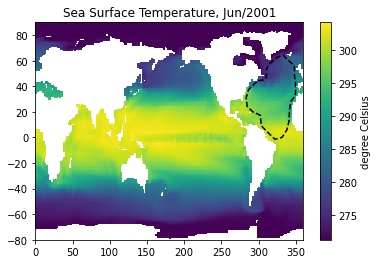

In [28]:
# plotting the 'tos' data for the month of June and the atlanticBnd
import matplotlib.pyplot as plt
plt.pcolormesh(lonGrid,latGrid, tos[5],shading='auto') 
plt.plot(atlanticBnd[:,1], atlanticBnd[:,0], 'k--')
cbar = plt.colorbar()

# adding labels
cbar.set_label('degree Celsius')
plt.title("Sea Surface Temperature, Jun/2001")

You can see the boundary of the deeper Atlantic ocean is now outlined between Europe and North America. 

### Create a Shapely Polygon from a boundary saved in a textfile

In the next step, before we can generate a mask for this region, we need to convert the outline of the Atlantic (which we have saved in a numpy array) into a shapely Polygon.

Let's use the boundary for the deep Atlantic to generate a shapely Polygon. Remember, shapely Polygon objects only accept coordinate-tuples as input. For that, we have to index each coordinate pair in `atlanticBnd` and convert it to a tuple. For the first coordinate pair in the array, this would look like this:

In [29]:
# transforming the first row in atlanticBnd to a tuple
tuple(atlanticBnd[0,:])

(44.65755072, 299.5753383)

Now, we want to restructure the entire array into a list that contains a tuple for each coordinate pair (row in the array). We can do this in a for-loop!

In [30]:
# Create an empty list
atlanticList = []

# Convert all coordinate pairs in the array to a tuple
# and append them to the list
for i in range(len(atlanticBnd)):
     atlanticList.append(tuple(atlanticBnd[i,:]))
        

Now we have a list of coordinate tuples:

In [31]:
# printing out the AtlanticList
atlanticList

[(44.65755072, 299.5753383),
 (44.65755072, 303.4247678),
 (45.18850652, 308.20337),
 (47.74942097, 310.8328232),
 (53.16310901, 310.712519),
 (57.13501196, 313.6456669),
 (62.74447108, 325.2173767),
 (64.34821219, 333.1024371),
 (60.07156924, 340.4529172),
 (56.06221648, 348.0706874),
 (48.17715605, 348.3379776),
 (43.46290018, 349.6179222),
 (36.56047481, 349.8834001),
 (32.44556738, 349.2197054),
 (28.4633989, 343.6446695),
 (21.82645143, 341.6535852),
 (12.80020288, 340.9898905),
 (6.003870948, 338.1418717),
 (0.10896619, 331.6454461),
 (-1.402864703, 322.0082207),
 (3.906693271, 312.5837553),
 (9.216251245, 303.6902457),
 (17.44606611, 302.3628562),
 (19.96810614, 292.540174),
 (24.34849147, 284.708576),
 (30.98543894, 283.3811865),
 (37.22416956, 286.4341823),
 (40.80812119, 292.540174),
 (44.65755072, 299.5753383)]

And we can generate a shapely Polygon from that:

In [32]:
# transforming the AtlanticList to a shapely polygon
from shapely.geometry import Point, Polygon
atlanticPoly = Polygon(atlanticList)

Shapely gives us even a very quick glance at the polygon, if we just execute its name:

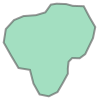

In [33]:
# printing out the shapely polygon atlanticPoly
atlanticPoly

With that we are one step closer to selecting raster points inside the polygon! However, first we need to perform some practical steps, for handeling the large global dataset of sea surface temperatures.

### Reduce the global dataset to a map frame emcompassing the polygon

Since a global dataset has a lot of points, we would have to run the PIP check many times. But we actually know that our area locates only in the northwest (NW) portion of the global dataset. So before we attempt to generate the mask, we reduce our global dataset to a new dataframe that is encompassing the atlantic boundaries, but not much more. We have done something like this in the previous notebook so, below we will add the entire code to do the same here.

For that, we have been selecting the boundaries of the new data frame visually from the maps above:

In [34]:
# setting boundaries of the new data frame for our analysis
latMin = -2
latMax = 80
lonMin = 260  # lon coordinates in this dataset go from 0...360!!!
lonMax = 360  # lon coordinates in this dataset go from 0...360!!!

# Finding indexes in the datasets that belong to the new boundaries
idx_latMax = np.argmin(np.abs(lat-latMax))
idx_latMin = np.argmin(np.abs(lat-latMin))
idx_lonMax = np.argmin(np.abs(lon-lonMax))
idx_lonMin = np.argmin(np.abs(lon-lonMin))

# reducing the data and coordinate arrays to this frame
# only adjusting coordinate dimensions, not the time dimension (first one)
tos_NW = tos[:,idx_latMin:idx_latMax,idx_lonMin:idx_lonMax]
lon_grid_NW = lonGrid[idx_latMin:idx_latMax,idx_lonMin:idx_lonMax]
lat_grid_NW = latGrid[idx_latMin:idx_latMax,idx_lonMin:idx_lonMax]

# reducing also the 1D coordinate arrays
lon_NW = lon[idx_lonMin:idx_lonMax]
lat_NW = lat[idx_latMin:idx_latMax]

To control our code, let's print the reduced dataset to a map, before we continue to create the mask for the atlantic:

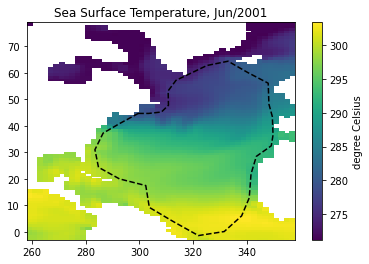

In [35]:
# plotting 'tos' and atlanticBnd for the new northwest data frame
plt.pcolormesh(lon_grid_NW,lat_grid_NW, tos_NW[5],shading='auto') 
plt.plot(atlanticBnd[:,1], atlanticBnd[:,0], 'k--')
cbar = plt.colorbar()

# adding title and label to the colorbar
plt.title("Sea Surface Temperature, Jun/2001")
cbar.set_label('degree Celsius')

This looks good. Now we have a smaller datagrid, which will be faster to process. The reduced dataset has the shape:

In [36]:
# receiving shape/dimensions of ncTOS_NW
tos_NW.shape

(24, 82, 50)

This is 24 time steps, 82 latitudinal grid rows and 50 longitudinal grid columns. The latter two should and do match the map above. 

### Select raster points inside the polygon & create the spatial mask

Now, we want to find all the grid points of this reduced sea surface temperature dataset that fall inside the polygon. 

The module shapely provides two functions for that `within()` and `contain()`. Since we will have **many points and just one polygon**, the goal will be to:
* iterate over all points in the 2D raster data array, 
* generate a shapely Point for each coordinate pair, and
* then check, one at a time, if it is `within()` the polygon specified!

The check in the last step will return True for data points inside the polygon and false for points outside the polygon! When checking each raster point, whether it is inside the boundary, we save the results in a new array **`atlanticMask`** in the form of zeros and ones. This will be the **spatial mask** we want to get for our dataset of the size (82x50). (We will not touch the dimension of the time series.)

For checking all the raster points in the 2D data array, we need a nested for loop that iterates over all items in the array. This has to be done in two directions: in longitude and in latitude direction. Below, we have formulated algorithm for that in pseudo code:

``` 
SET atlanticMask to numpy array containing 0 and of shape of raster data set
FOR latitude-iteration
    FOR longitude-iteration
        convert lat/lon pair to shapely point
        check if point is inside polygon
        assign current item in atlanticMask to integer value of check (0/1)
    ENDFOR
ENDFOR
```

So let's code this pseudo code into Python. You have to be very careful to index the lat/lon dimensions at their right positions during indexing.

In [37]:
# mask array containing only 0, of size lon x lat
atlanticMask = np.zeros(tos_NW.shape[1:])

# nested loop to check if points inside polygon and fill the mask

# iterate through longitude array
for lo_i in range(len(lon_NW)):

    # iterate through latitude array
    for la_i in range(len(lat_NW)):
        
        # set current lon/lat
        lo = lon_NW[lo_i]  # current longitude coord in iteration
        la = lat_NW[la_i]  # current latitude coord in iteration
        
        # create current point
        currentPoint = Point(la,lo)
        
        # check if point inside: returns true or false
        check = currentPoint.within(atlanticPoly)
        atlanticMask[la_i,lo_i] = int(check)


Running this creates the new mask array `atlanticMask`, which contains 0 outside and 1 inside the Atlantic Polygon. Now, let's print that new mask, to check if your result is correct!

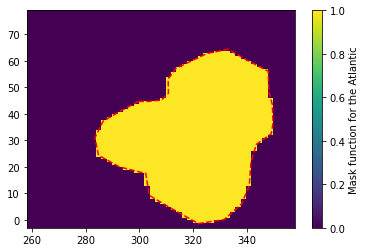

In [38]:
# plotting the atlanticMask
plt.pcolormesh(lon_grid_NW,lat_grid_NW, atlanticMask,shading='auto')

# plotting the Atlantic boundaries (atlanticBnd) 
plt.plot(atlanticBnd[:,1], atlanticBnd[:,0], 'r--')

# adding colorbar and label for the colorbar
cbar = plt.colorbar()
cbar.set_label('Mask function for the Atlantic')

As you can see, that worked perfectly. We now have a mask array `atlanticMask`, which contains 0 outside the polygon and 1 inside the polygon.

From that we can repeat our time series analysis from above: estimate the average sea surface temperature for each month in the time series and plot the graph. This time, we only have to multiply each monthly map with the mask array and use the `nanmean()` function. For making that work, we convert all 0 values in the mask array to `np.nan` values:

In [39]:
# assigning np.nan values to 0 values in atlanticMask
atlanticMask[atlanticMask==0] = np.nan  

In [40]:
atlanticMask

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

When plotting this, it looks like the following (nan values are maked out in white):

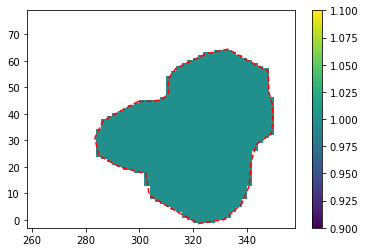

In [41]:
# plotting the atlanticMask, containing nan instead of 0
plt.pcolormesh(lon_grid_NW,lat_grid_NW, atlanticMask,shading='auto') 
plt.plot(atlanticBnd[:,1], atlanticBnd[:,0], 'r--')
cbar = plt.colorbar()

Now, let's use our data set for the NW of the globe and repeat the time series analysis, to estimate the mean sea surface temperatures inside the Atlantic polygon and for each month:

In [42]:
# getting the number of months in the dataset (we know its 24)
NoOfMonths = len(ncTime)     

# creating a numpy array of that length
monthlyMeanTos_NW = np.zeros(NoOfMonths)  

# in a for loop: estimating the mean global SST per month
for t in range(NoOfMonths):           
    monthlyMeanTos_NW[t] = np.nanmean(tos_NW[t]*atlanticMask) # multiply dataset with polygon mask

Text(0, 0.5, 'Temperature (Celsius)')

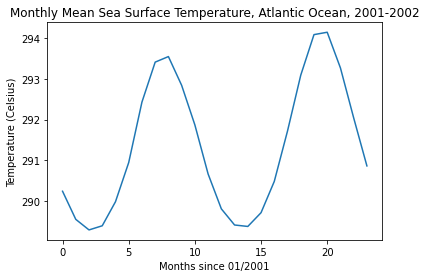

In [43]:
# plotting the time series
plt.plot(range(NoOfMonths),monthlyMeanTos_NW)

# adding title and axes labels
plt.title("Monthly Mean Sea Surface Temperature, Atlantic Ocean, 2001-2002")
plt.xlabel('Months since 01/2001')
plt.ylabel('Temperature (Celsius)')

Our time variable from the netCDF dataset contained days since January 01, 2001. We can also use that information for adjusting the labels in the x-axis.

### Making use of the time vector in the netCDF dataset

The netCDF dataset provided us also with an array containing information on the time stamps of the 24 maps of sea surface temperatures during 2001-2002.

For that let's have a closer look to the time variable of the netCDF file. Let's first print out the variable information again:

In [44]:
# printing infor for variable 'time' in the netCDF file
ncData = Dataset('./tos_O1_2001-2002.nc')
print(ncData.variables['time'] )
ncData.close()

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: time
    units: days since 2001-1-1
    axis: T
    calendar: 360_day
    bounds: time_bnds
    original_units: seconds since 2001-1-1
unlimited dimensions: time
current shape = (24,)
filling on, default _FillValue of 9.969209968386869e+36 used


<ipython-input-44-90695d650faf>:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(ncData.variables['time'] )


And looking into the exact content of the variable, we see the following:

In [45]:
# printing the content of the 'time' variable from the netCDF file
ncTime   

array([ 15.,  45.,  75., 105., 135., 165., 195., 225., 255., 285., 315.,
       345., 375., 405., 435., 465., 495., 525., 555., 585., 615., 645.,
       675., 705.])

You can see the time variable contains a 1D array, with running numbers from 0 to 705. And from the self-describing information we can receive info on the units of the time vector:
    
    units: days since 2001-1-1
  
That means that the running numbers from 0 to 705 for the time stamps of the 24 maps indicate how many days have passed since January 1, 2001 when the maps were recorded.

We can use function `timedelta` of the module `datetime` to convert these dates, which allows to add a certain number of days to a defined date `datetime()` function. So let's import both functions from the datetime module first:

In [46]:
# importing functions datetime and timedelta from the datetime module
from datetime import datetime
from datetime import timedelta

Now we want to get the date for the first entry in `ncTime`, which is 15 days after January 1, 2001. For that we would have to define the same date using the `datetime()` function and then add the 15 days to it using the `timedelta()` function:

In [47]:
datetime(2001, 1, 1) + timedelta(15)   # adding 15 days to the date 2001/01/01

datetime.datetime(2001, 1, 16, 0, 0)

Now we got the date for January 16, 2001, which is exactly 15 days after Januar 1, 2001. Using a list comprehension, we can do the same for all items in the time array `ncTime` and assign the outcome to a new variable `ncTime_date`:

In [48]:
# adding number of days in ncTime to the date 2001/01/01
ncTime_date = [ datetime(2001, 1, 1) + timedelta(date) for date in ncTime ]
ncTime_date

[datetime.datetime(2001, 1, 16, 0, 0),
 datetime.datetime(2001, 2, 15, 0, 0),
 datetime.datetime(2001, 3, 17, 0, 0),
 datetime.datetime(2001, 4, 16, 0, 0),
 datetime.datetime(2001, 5, 16, 0, 0),
 datetime.datetime(2001, 6, 15, 0, 0),
 datetime.datetime(2001, 7, 15, 0, 0),
 datetime.datetime(2001, 8, 14, 0, 0),
 datetime.datetime(2001, 9, 13, 0, 0),
 datetime.datetime(2001, 10, 13, 0, 0),
 datetime.datetime(2001, 11, 12, 0, 0),
 datetime.datetime(2001, 12, 12, 0, 0),
 datetime.datetime(2002, 1, 11, 0, 0),
 datetime.datetime(2002, 2, 10, 0, 0),
 datetime.datetime(2002, 3, 12, 0, 0),
 datetime.datetime(2002, 4, 11, 0, 0),
 datetime.datetime(2002, 5, 11, 0, 0),
 datetime.datetime(2002, 6, 10, 0, 0),
 datetime.datetime(2002, 7, 10, 0, 0),
 datetime.datetime(2002, 8, 9, 0, 0),
 datetime.datetime(2002, 9, 8, 0, 0),
 datetime.datetime(2002, 10, 8, 0, 0),
 datetime.datetime(2002, 11, 7, 0, 0),
 datetime.datetime(2002, 12, 7, 0, 0)]

This looks great, because now we can use these dates to add them to our plots, as we have done in previous lesson. 

### Adding dates to the time series graph

For that we just add the variable `ncTime_date` to the `plot()` function, together with the time series `monthlyMeanTos_NW`. Since the date labels are relatively long, they might overlap. For that let's also enlarge the plot a bit (using the `rcParams` attribute of the pyplot package):

Text(0, 0.5, 'Temperature (Celsius)')

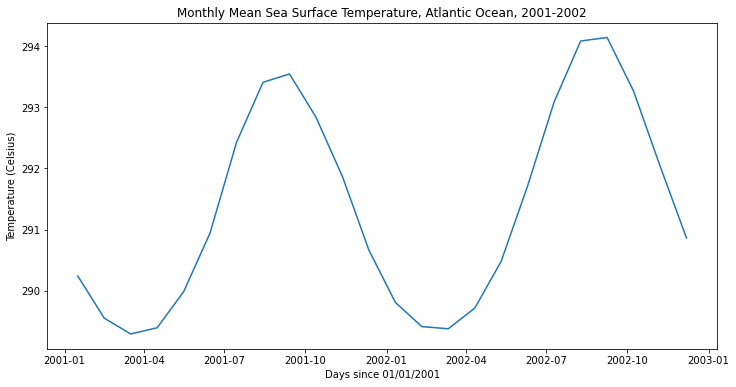

In [49]:
# setting the size of the plot
plt.rcParams['figure.figsize'] = [12, 6]   

# plotting time series with correct dates
plt.plot(ncTime_date,monthlyMeanTos_NW)    

# adding title and axes labels
plt.title("Monthly Mean Sea Surface Temperature, Atlantic Ocean, 2001-2002")
plt.xlabel('Days since 01/01/2001')
plt.ylabel('Temperature (Celsius)')

### Compare sea surface temperatures in the Atlantic to those in the seas of northern hemisphere 

Now we can plot the time series of mean sea surface temperatures in the atlancic together with the time series for the northern hemisphere to compare them in one graph. And you can also export the final graph to an image file. For that we are adding the the pyplot function `plt.savefig('filename.png')` to the bottom of the next code cell:

In [50]:
# keep all time steps and longitudes, slice only along latitude
tos_data_north = tos[:,80:170,:]

# getting the number of months in the dataset (we know its 24)
NoOfMonths = len(ncTime)     

# creating a numpy array of that length
monthlyMeanTOS_north = np.zeros(NoOfMonths)  

# iterating over each month in a for-loop: estimating mean 'tos' for northern hemisphere
for t in range(NoOfMonths):            
    monthlyMeanTOS_north[t] = np.nanmean(tos_data_north[t])

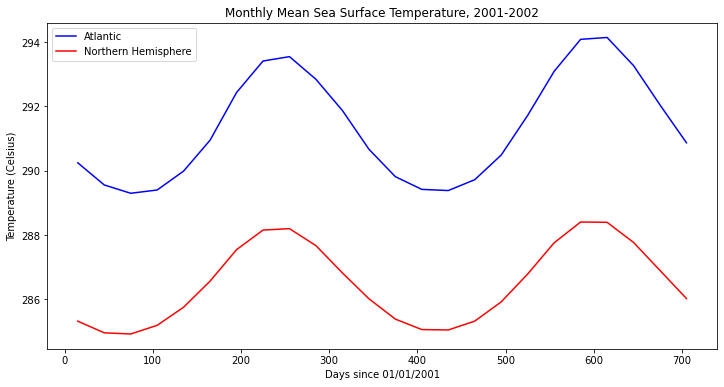

In [51]:
# setting the size of the plot
plt.rcParams['figure.figsize'] = [12, 6]   

# plotting time series with correct dates and adding labels for each time series
line1, = plt.plot(ncTime,monthlyMeanTos_NW, 'b',label='Atlantic')
line2, = plt.plot(ncTime,monthlyMeanTOS_north, 'r',label='Northern Hemisphere')

# adding title and axes labels
plt.title("Monthly Mean Sea Surface Temperature, 2001-2002")
plt.xlabel('Days since 01/01/2001')
plt.ylabel('Temperature (Celsius)')

# adding a legend
plt.legend(handles=[line1, line2])

# save the image to a file
#plt.savefig('MonthlyMeanSST.png')

As you can see, the atlantic is on average about 4 degree Celsius warmer than the rest of the sea in the norther hemisphere. This is not surprising, as the oceans of the northern hemisphere include also those of the arctic!

### Print a map of mean temperatures per pixel

Instead of averaging the sea surface temperatures over the space. We can also average them over time. From this we could, for example, analyze the global mean sea surface temperature for a certain year and study it's spatial distribution. Then we could compare this to a second year.

Let's do this for the `tos` data for the data frame covering the atlantic, which we named `ncTos_NW` above. Remember the shape of that dataset?

In [52]:
tos_NW.shape

(24, 82, 50)

Again, we have 24 time steps, 82 latitudinal grid rows and 50 longitudinal grid columns. Before we have calculated the mean averaging over certain grid points (those within our Atlantic Boundary).

Now we want to calculate a mean for each grid point, averaging over the first 12 time steps (for the year 2001). For that we have to iterate over the grid points in latitude and longitude direction, similarly to when we checked the grid-points location inside or outside the Atlantic polygon. Then, for each grid-point, we average the time series for 2001 (the first 12 records in the time series for each grid point: 

In [53]:
# generate new array of same spatial size as the tos dataset 
#   should receive average temperatures during the first year (2001)
average2001_NW = np.zeros(tos_NW.shape[1:])

# nested loop to check if points inside polygon and fill the mask

# iterate through longitude array
for lo_i in range(len(lon_NW)):
    
    # iterate through latitude array
    for la_i in range(len(lat_NW)):
        
        # average over the first 12 records in the time series for current grid points
        # for that we slice out the time series of the current grid point from ncTos_NW:
        curr_timeSeries = tos_NW[:12,la_i,lo_i]
          
        # Then, we have to catch those cases with any nan entries
        # (the nanmean function creates a warning if all entries are nan)
        if (np.any(np.isnan(curr_timeSeries))):
            # assign np.nan to resulting grid point, if nan value in time series
            average2001_NW[la_i,lo_i] = np.nan
        else:
            # assign mean of time series to current grid point
            average2001_NW[la_i,lo_i] = np.nanmean(curr_timeSeries)
            

Now we can plot a map of mean sea surface temperatures during 2001, which we saved in the new array `average2001_NW`!

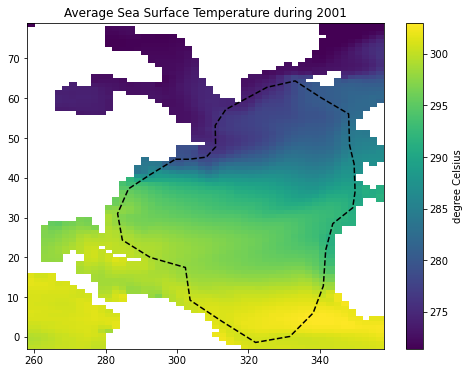

In [54]:
# plotting map of mean temperatures for 2001
plt.rcParams['figure.figsize'] = [8, 6]   
plt.pcolormesh(lon_grid_NW,lat_grid_NW, average2001_NW,shading='auto') 
plt.plot(atlanticBnd[:,1], atlanticBnd[:,0], 'k--')
cbar = plt.colorbar()

# adding title and label to the colorbar
plt.title("Average Sea Surface Temperature during 2001")
cbar.set_label('degree Celsius')

And of course, the north is warmer than the south.

To get the same result for 2002:

In [55]:
# generate new array of same spatial size as the tos dataset 
#   should receive average temperatures during the first year (2001)
average2002_NW = np.zeros(tos_NW.shape[1:])

# nested loop to check if points inside polygon and fill the mask

# iterate through longitude array
for lo_i in range(len(lon_NW)):
    
    # iterate through latitude array
    for la_i in range(len(lat_NW)):
        
        # average over the first 12 records in the time series for current grid points
        # for that we slice out the time series of the current grid point from ncTos_NW:
        curr_timeSeries = tos_NW[12:,la_i,lo_i]
          
        # Then, we have to catch those cases with any nan entries
        # (the nanmean function creates a warning if all entries are nan)
        if (np.any(np.isnan(curr_timeSeries))):
            # assign np.nan to resulting grid point, if nan value in time series
            average2002_NW[la_i,lo_i] = np.nan
        else:
            # assign mean of time series to current grid point
            average2002_NW[la_i,lo_i] = np.nanmean(curr_timeSeries)
            

Now we can also add both maps, for 2001 and 2002 into two subplots:

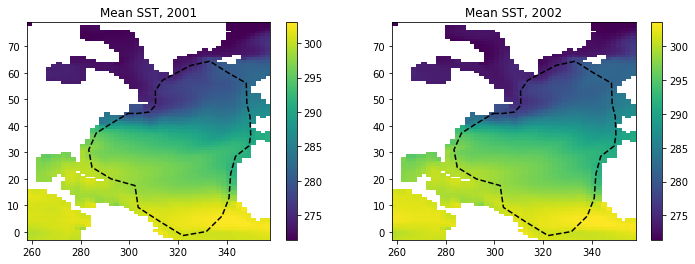

In [56]:
# plotting map of mean temperatures for 2001 and 2002 in subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# plotting map for 2001 in the left subplot
left = axes[0].pcolormesh(lon_grid_NW,lat_grid_NW, average2001_NW,shading='auto') 
axes[0].plot(atlanticBnd[:,1], atlanticBnd[:,0], 'k--')
axes[0].set_title("Mean SST, 2001")
plt.colorbar(left, ax=axes[0])

# plotting map for 2002 in the right subplot
right = axes[1].pcolormesh(lon_grid_NW,lat_grid_NW, average2002_NW,shading='auto') 
axes[1].plot(atlanticBnd[:,1], atlanticBnd[:,0], 'k--')
axes[1].set_title("Mean SST, 2002")

plt.colorbar(right, ax=axes[1])

And 2002 was a bit warmer than 2001, as the upper range of the values in the colorbar is higher for 2002 than for 2001. You can make the same conclusion from the last plotted time series above. There, the seasonal max during 2002 is a bit higher than the seasonal max for 2001!

To generate these subfigure plots, add label and colorbar for them individually, one has to address figure axes in object oriented fashion. We do not expect you to know this for the final project, but we encourage you to try this a bit by using the code above as template.

You will need a lot of practise and trial and error to learn to code such subfigures, as there are hundrets of different settings. The best way to do that is to look for code templates in the matplotlib documentation pages.

### Compare histogram of average Atlantic temperatures in 2001 and 2002
As the map shows above, also a histrogram indicates that Atlantic temperatures where very similar in 2001 and 2002. There are only slighly a few less occurances of extreme cold average temperature in 2002.

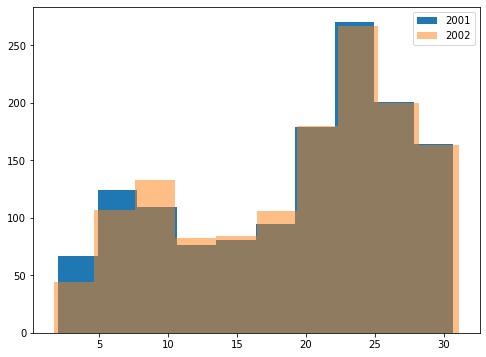

In [72]:
import matplotlib.pyplot as plt

plt.hist(average2001_NW[np.isfinite(average2002_NW*atlanticMask)]-272.15,10,label = '2001')
plt.hist(average2002_NW[np.isfinite(average2002_NW*atlanticMask)]-272.15,10, alpha = 0.5,label = '2002')
plt.legend()
